#Library and Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

In [ ]:
train_df = pd.read_csv('/content/survey.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

#Data Cleaning

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [ ]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning NaN

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [ ]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [ ]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [ ]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [ ]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


#Encoding Data

In [ ]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

In [ ]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Testing there aren't any missing data

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

Features Scaling: We're going to scale age, because it is extremely different from the other ones.

#Covariance Matrix. Variability comparison between categories of variables

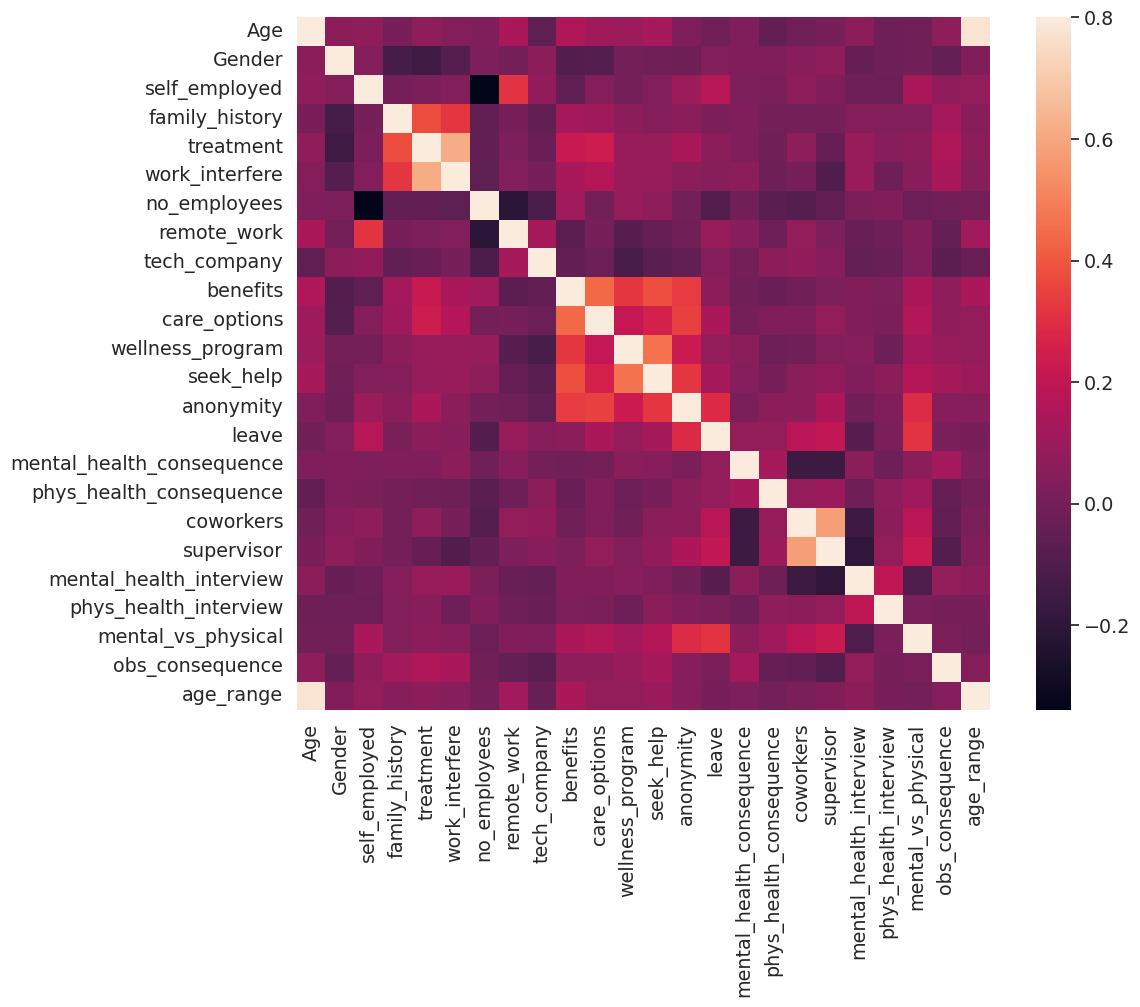

In [ ]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

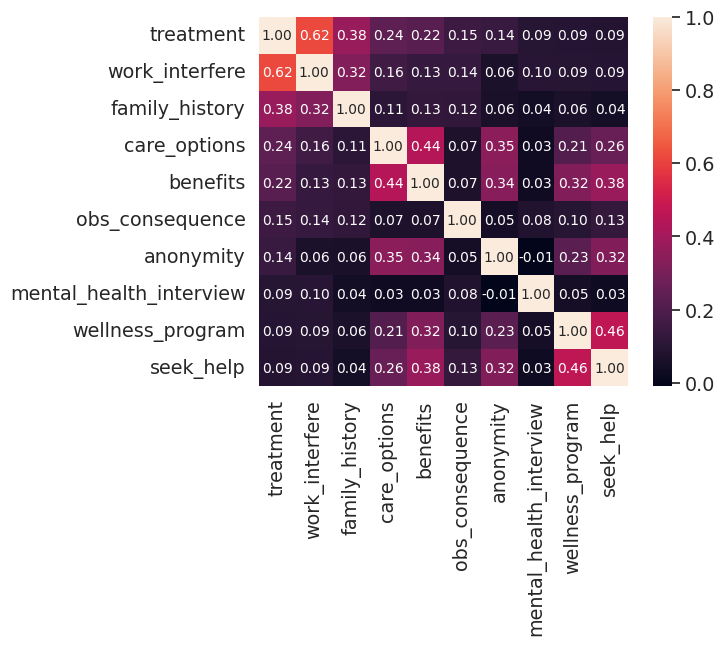

In [ ]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Distribution** and density by Age

<ipython-input-114-32fd91214377>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

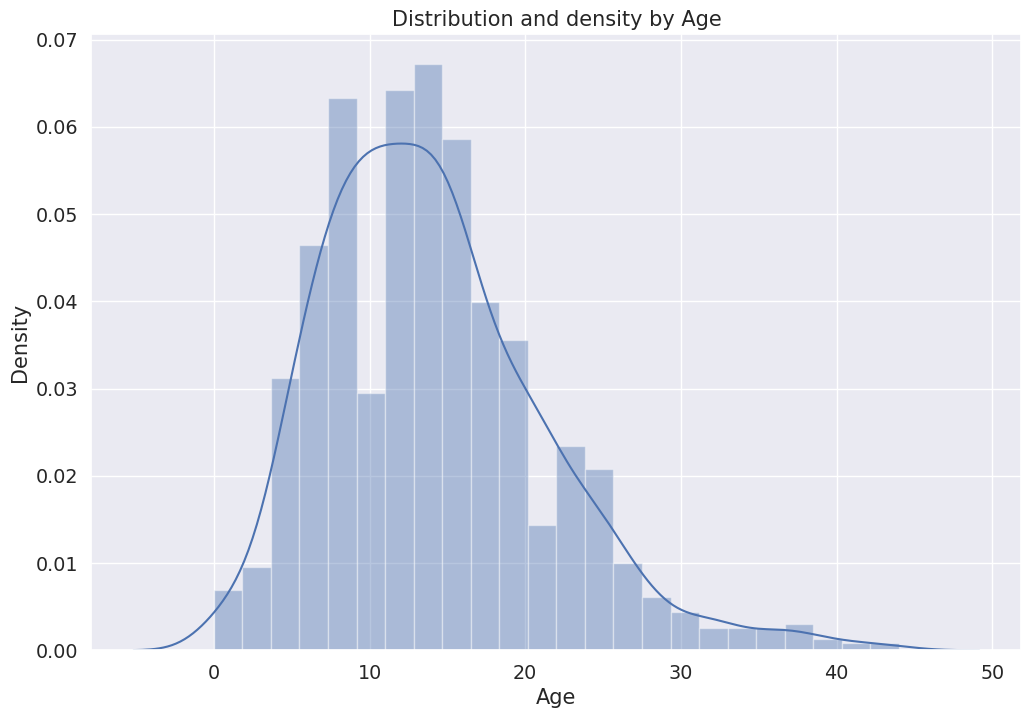

In [ ]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

Separate by treatment

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


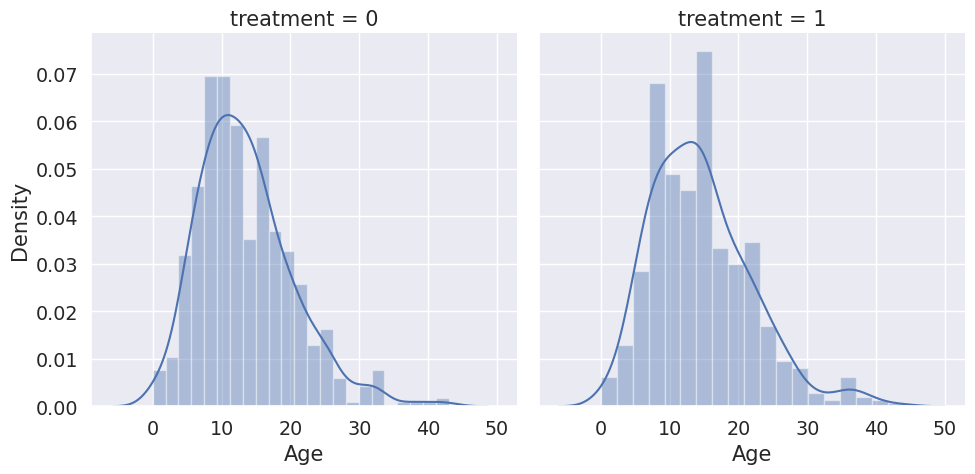

In [ ]:
g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age")


How many people has been treated?

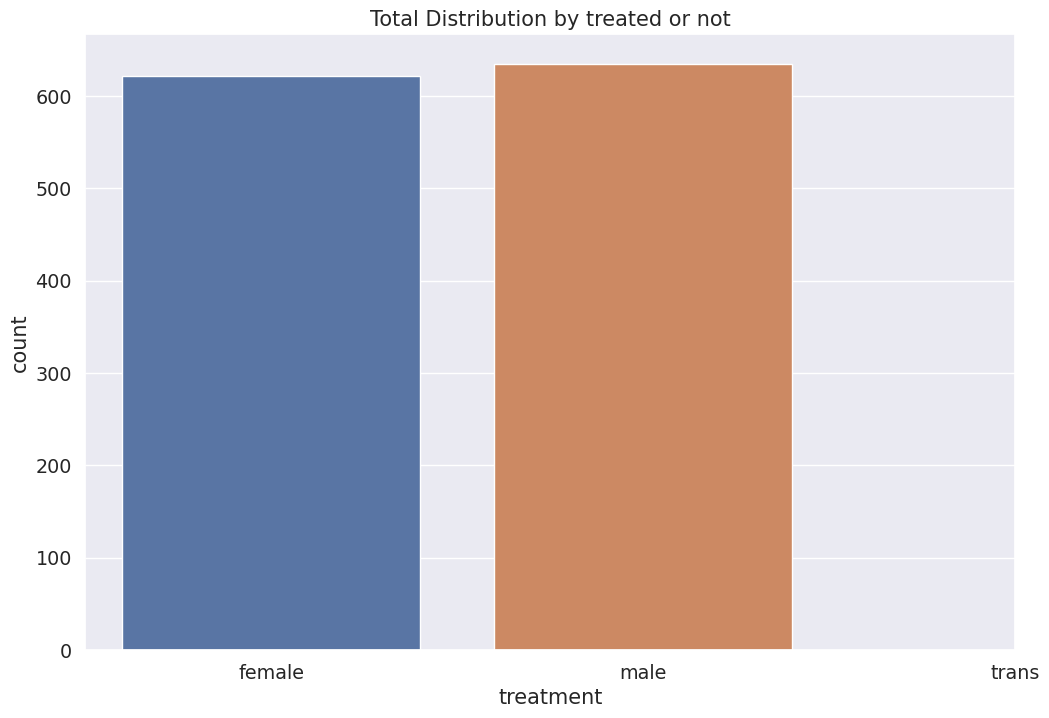

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming labelDict is a dictionary containing labels for 'label_Gender'
labels = labelDict['label_Gender']

plt.figure(figsize=(12, 8))
g = sns.countplot(x="treatment", data=train_df)
g.set_xticks(range(len(labels)))  # Setting the tick locations
g.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')
plt.show()


Nested barplot to show probabilities for class and sex

<ipython-input-117-137f8de4f268>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


<Figure size 1200x800 with 0 Axes>

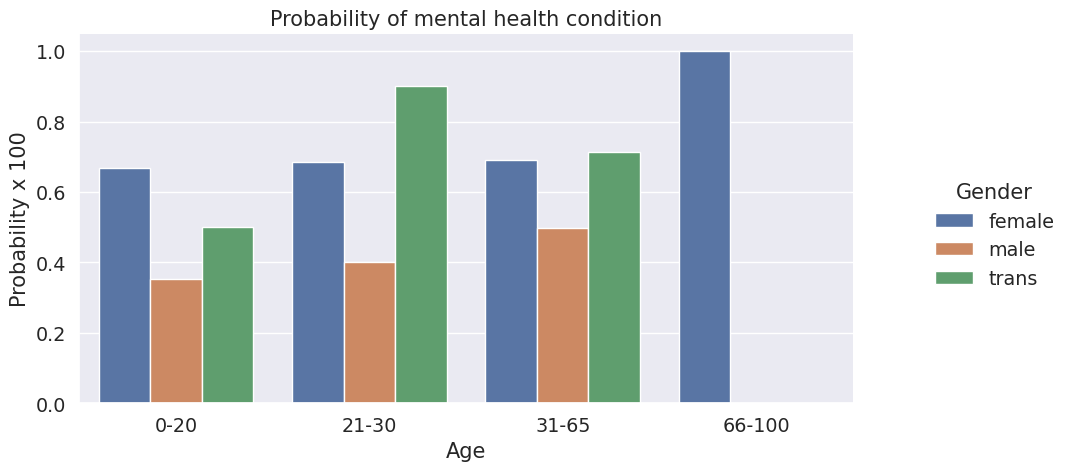

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming labelDict is a dictionary containing labels for 'label_age_range' and 'label_Gender'
o = labelDict['label_age_range']
new_labels = labelDict['label_Gender']

plt.figure(figsize=(12, 8))
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


Barplot to show probabilities for family history

<ipython-input-118-592a6b066523>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


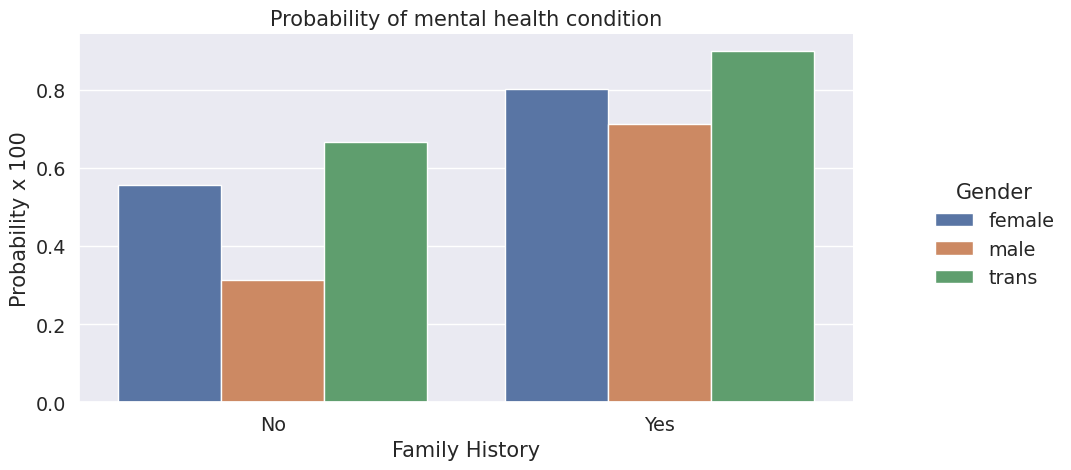

In [ ]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for care options

<ipython-input-119-4a4fde72819d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


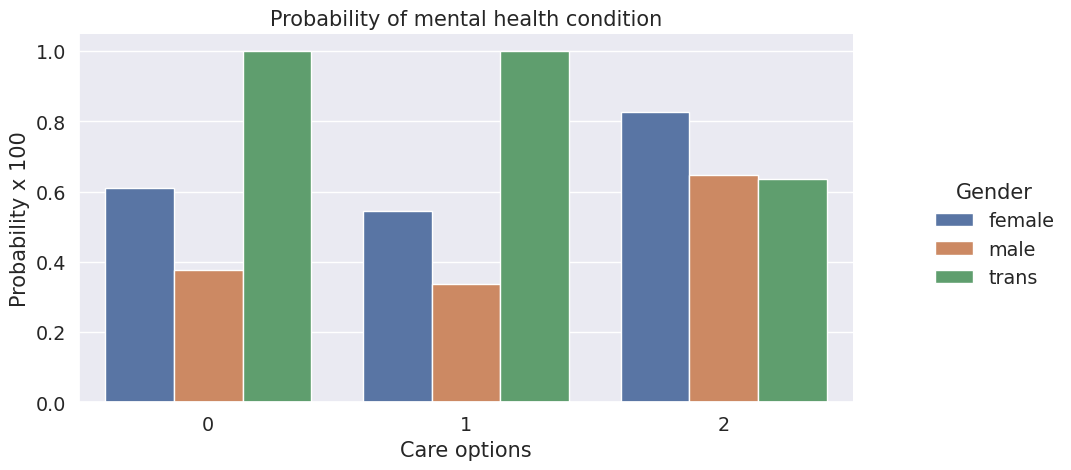

In [ ]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for benefits



<ipython-input-120-c3f5e0d2fbff>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


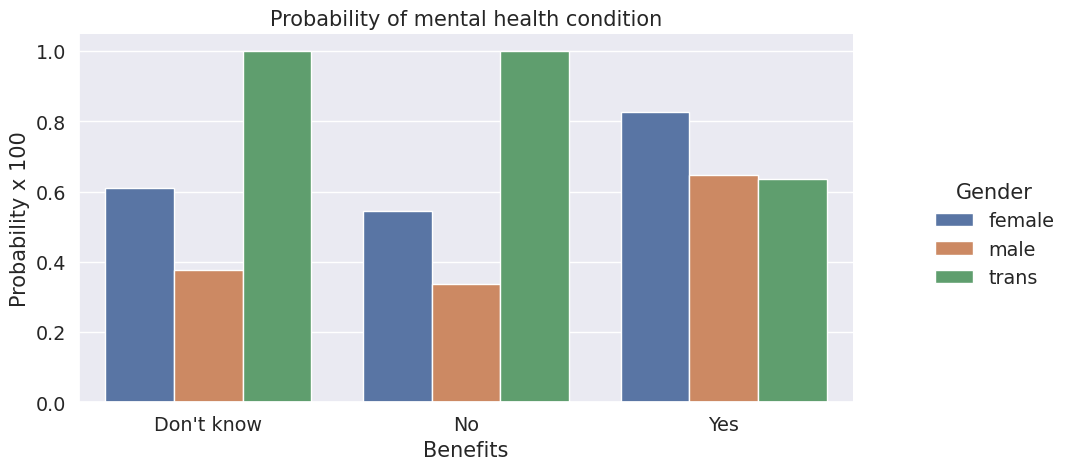

In [ ]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)

g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for work interfere



<ipython-input-121-dd2bee7da02c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


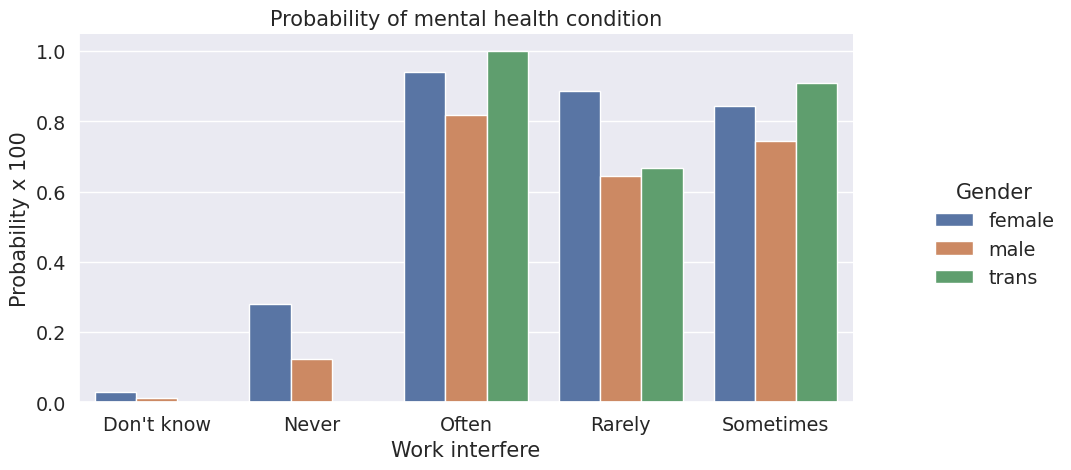

In [ ]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

#Scaling and Fitting

Features Scaling We're going to scale age, because is extremely different from the othere ones.



In [ ]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1257 non-null   float64
 1   Gender                     1257 non-null   int64  
 2   self_employed              1257 non-null   int64  
 3   family_history             1257 non-null   int64  
 4   treatment                  1257 non-null   int64  
 5   work_interfere             1257 non-null   int64  
 6   no_employees               1257 non-null   int64  
 7   remote_work                1257 non-null   int64  
 8   tech_company               1257 non-null   int64  
 9   benefits                   1257 non-null   int64  
 10  care_options               1257 non-null   int64  
 11  wellness_program           1257 non-null   int64  
 12  seek_help                  1257 non-null   int64  
 13  anonymity                  1257 non-null   int64

Spilitting Dataset

In [ ]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
# You can adjust the learning_rate, n_estimators, and other hyperparameters
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Example evaluation using the y_test and y_pred variables from your classifier
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("MCC:", mcc)



Accuracy: 0.9625
Confusion Matrix:
 [[110   9]
 [  0 121]]
Precision: 0.9307692307692308
Recall: 1.0
F1 Score: 0.9641434262948207
ROC-AUC: 0.9621848739495799
MCC: 0.9275639704076741


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the accuracy of the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Example evaluation metrics for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logreg)
print("Precision (Logistic Regression):", precision_logreg)
print("Recall (Logistic Regression):", recall_logreg)
print("F1 Score (Logistic Regression):", f1_logreg)
print("ROC-AUC (Logistic Regression):", roc_auc_logreg)
print("MCC (Logistic Regression):", mcc_logreg)


Logistic Regression Accuracy: 0.8541666666666666
Confusion Matrix (Logistic Regression):
 [[ 93  26]
 [  9 112]]
Precision (Logistic Regression): 0.8115942028985508
Recall (Logistic Regression): 0.9256198347107438
F1 Score (Logistic Regression): 0.8648648648648649
ROC-AUC (Logistic Regression): 0.8535662198763803
MCC (Logistic Regression): 0.7151996574266063


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create a Random Forest classifier
forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_forest = forest_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)

# Example evaluation metrics for Random Forest
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
roc_auc_forest = roc_auc_score(y_test, y_pred_forest)
mcc_forest = matthews_corrcoef(y_test, y_pred_forest)

print("Confusion Matrix (Random Forest):\n", conf_matrix_forest)
print("Precision (Random Forest):", precision_forest)
print("Recall (Random Forest):", recall_forest)
print("F1 Score (Random Forest):", f1_forest)
print("ROC-AUC (Random Forest):", roc_auc_forest)
print("MCC (Random Forest):", mcc_forest)


Random Forest Accuracy: 0.9666666666666667
Confusion Matrix (Random Forest):
 [[111   8]
 [  0 121]]
Precision (Random Forest): 0.937984496124031
Recall (Random Forest): 1.0
F1 Score (Random Forest): 0.9680000000000001
ROC-AUC (Random Forest): 0.9663865546218487
MCC (Random Forest): 0.9353751733245839


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Example evaluation metrics for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm)
print("ROC-AUC (SVM):", roc_auc_svm)
print("MCC (SVM):", mcc_svm)


SVM Accuracy: 0.9041666666666667
Confusion Matrix (SVM):
 [[ 96  23]
 [  0 121]]
Precision (SVM): 0.8402777777777778
Recall (SVM): 1.0
F1 Score (SVM): 0.9132075471698113
ROC-AUC (SVM): 0.9033613445378151
MCC (SVM): 0.8233293074216317


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Example evaluation metrics for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)

print("Confusion Matrix (KNN):\n", conf_matrix_knn)
print("Precision (KNN):", precision_knn)
print("Recall (KNN):", recall_knn)
print("F1 Score (KNN):", f1_knn)
print("ROC-AUC (KNN):", roc_auc_knn)
print("MCC (KNN):", mcc_knn)


KNN Accuracy: 0.9708333333333333
Confusion Matrix (KNN):
 [[112   7]
 [  0 121]]
Precision (KNN): 0.9453125
Recall (KNN): 1.0
F1 Score (KNN): 0.9718875502008032
ROC-AUC (KNN): 0.9705882352941176
MCC (KNN): 0.9432422182837985


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_tree = tree_classifier.predict(X_test)

# Evaluate the accuracy of the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# Example evaluation metrics for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
mcc_tree = matthews_corrcoef(y_test, y_pred_tree)

print("Confusion Matrix (Decision Tree):\n", conf_matrix_tree)
print("Precision (Decision Tree):", precision_tree)
print("Recall (Decision Tree):", recall_tree)
print("F1 Score (Decision Tree):", f1_tree)
print("ROC-AUC (Decision Tree):", roc_auc_tree)
print("MCC (Decision Tree):", mcc_tree)


Decision Tree Accuracy: 0.95
Confusion Matrix (Decision Tree):
 [[108  11]
 [  1 120]]
Precision (Decision Tree): 0.916030534351145
Recall (Decision Tree): 0.9917355371900827
F1 Score (Decision Tree): 0.9523809523809524
ROC-AUC (Decision Tree): 0.9496492812000834
MCC (Decision Tree): 0.9030694863242995


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create a Decision Tree classifier (as the base estimator)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier with the Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the accuracy of the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)

# Example evaluation metrics for Bagging
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
roc_auc_bagging = roc_auc_score(y_test, y_pred_bagging)
mcc_bagging = matthews_corrcoef(y_test, y_pred_bagging)

print("Confusion Matrix (Bagging):\n", conf_matrix_bagging)
print("Precision (Bagging):", precision_bagging)
print("Recall (Bagging):", recall_bagging)
print("F1 Score (Bagging):", f1_bagging)
print("ROC-AUC (Bagging):", roc_auc_bagging)
print("MCC (Bagging):", mcc_bagging)


Bagging Accuracy: 0.9625
Confusion Matrix (Bagging):
 [[110   9]
 [  0 121]]
Precision (Bagging): 0.9307692307692308
Recall (Bagging): 1.0
F1 Score (Bagging): 0.9641434262948207
ROC-AUC (Bagging): 0.9621848739495799
MCC (Bagging): 0.9275639704076741


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create a Decision Tree classifier (as the base estimator)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)  # Decision stump

# Create an AdaBoostClassifier with the Decision Tree as the base estimator
boosting_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the Boosting model
boosting_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate the accuracy of the Boosting model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Boosting Accuracy:", accuracy_boosting)

# Example evaluation metrics for Boosting
conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting)
recall_boosting = recall_score(y_test, y_pred_boosting)
f1_boosting = f1_score(y_test, y_pred_boosting)
roc_auc_boosting = roc_auc_score(y_test, y_pred_boosting)
mcc_boosting = matthews_corrcoef(y_test, y_pred_boosting)

print("Confusion Matrix (Boosting):\n", conf_matrix_boosting)
print("Precision (Boosting):", precision_boosting)
print("Recall (Boosting):", recall_boosting)
print("F1 Score (Boosting):", f1_boosting)
print("ROC-AUC (Boosting):", roc_auc_boosting)
print("MCC (Boosting):", mcc_boosting)


Boosting Accuracy: 0.9083333333333333
Confusion Matrix (Boosting):
 [[103  16]
 [  6 115]]
Precision (Boosting): 0.8778625954198473
Recall (Boosting): 0.9504132231404959
F1 Score (Boosting): 0.9126984126984128
ROC-AUC (Boosting): 0.9079797208139455
MCC (Boosting): 0.8193809093230516


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef
from sklearn.model_selection import train_test_split

# Create base classifiers
base_classifiers = [
    ('logreg', LogisticRegression(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
]

# Create the StackingClassifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Stacking model
stacking_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the accuracy of the Stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)

# Example evaluation metrics for Stacking
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)
mcc_stacking = matthews_corrcoef(y_test, y_pred_stacking)

print("Confusion Matrix (Stacking):\n", conf_matrix_stacking)
print("Precision (Stacking):", precision_stacking)
print("Recall (Stacking):", recall_stacking)
print("F1 Score (Stacking):", f1_stacking)
print("ROC-AUC (Stacking):", roc_auc_stacking)
print("MCC (Stacking):", mcc_stacking)


Stacking Accuracy: 0.9625
Confusion Matrix (Stacking):
 [[111   8]
 [  1 120]]
Precision (Stacking): 0.9375
Recall (Stacking): 0.9917355371900827
F1 Score (Stacking): 0.963855421686747
ROC-AUC (Stacking): 0.9622543232168901
MCC (Stacking): 0.9265378106400477


#Evaluating models

Logistic Regression

KNeighbors Classifier

Decision Tree classifier

Bagging

Boosting

Stacking

#Predicting with Neural Network

Create input function

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import argparse  # If argparse is needed for other purposes in your code


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

Define the feature columns

In [ ]:
from tensorflow.keras import layers

# Assuming train_df is your DataFrame containing the data
# Replace these columns with the actual columns from your dataset
feature_columns = [
    "Age", "Gender", "family_history",
    "benefits", "care_options", "anonymity",
    "leave", "work_interfere"
]

# Define the Keras input layers for the numeric features
inputs = {column: layers.Input(name=column, shape=(), dtype="float32") for column in feature_columns}

# Define the feature preprocessing layers (normalize if needed)
preprocessing_layers = {
    column: layers.Rescaling(1./train_df[column].max()) for column in feature_columns
}

# Preprocess each feature column
numeric_columns = [
    preprocessing_layers[column](inputs[column]) for column in feature_columns
]

# Concatenate the processed numeric columns
x = layers.concatenate(numeric_columns)

# Print summary of the processed features
print(x)


KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='concatenate_1/concat:0', description="created by layer 'concatenate_1'")


Instantiate an Estimator

In [ ]:
from tensorflow import keras

from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1024, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1024, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',  # You can choose different optimizers here
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])  # Additional metrics to track during training

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)  # Assuming X_train and y_train are your training data


Epoch 1/50
30/30 [==============================] - 4s 45ms/step - loss: 0.4843 - accuracy: 0.8667
Epoch 2/50
30/30 [==============================] - 1s 43ms/step - loss: 0.3070 - accuracy: 0.8844
Epoch 3/50
30/30 [==============================] - 1s 43ms/step - loss: 0.3156 - accuracy: 0.8740
Epoch 4/50
30/30 [==============================] - 1s 44ms/step - loss: 0.2663 - accuracy: 0.9042
Epoch 5/50
30/30 [==============================] - 1s 42ms/step - loss: 0.2208 - accuracy: 0.9083
Epoch 6/50
30/30 [==============================] - 1s 42ms/step - loss: 0.1848 - accuracy: 0.9250
Epoch 7/50
30/30 [==============================] - 1s 42ms/step - loss: 0.2278 - accuracy: 0.8948
Epoch 8/50
30/30 [==============================] - 1s 47ms/step - loss: 0.2054 - accuracy: 0.9177
Epoch 9/50
30/30 [==============================] - 2s 59ms/step - loss: 0.1812 - accuracy: 0.9354
Epoch 10/50
30/30 [==============================] - 2s 58ms/step - loss: 0.2020 - accuracy: 0.9208
Epoch 11/

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_test and y_test are your test data
# Assuming 'model' is your trained model

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, binary_predictions))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)


8/8 [==============================] - 0s 6ms/step
Accuracy: 97.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.97      0.98      0.97       122

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240

Confusion Matrix:
[[114   4]
 [  3 119]]


In [ ]:
pip install tensorflow tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1257 non-null   float64
 1   Gender                     1257 non-null   int64  
 2   self_employed              1257 non-null   int64  
 3   family_history             1257 non-null   int64  
 4   treatment                  1257 non-null   int64  
 5   work_interfere             1257 non-null   int64  
 6   no_employees               1257 non-null   int64  
 7   remote_work                1257 non-null   int64  
 8   tech_company               1257 non-null   int64  
 9   benefits                   1257 non-null   int64  
 10  care_options               1257 non-null   int64  
 11  wellness_program           1257 non-null   int64  
 12  seek_help                  1257 non-null   int64  
 13  anonymity                  1257 non-null   int64

Train the model

Making predictions (inferring) from the trained model

#Success method plot

In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

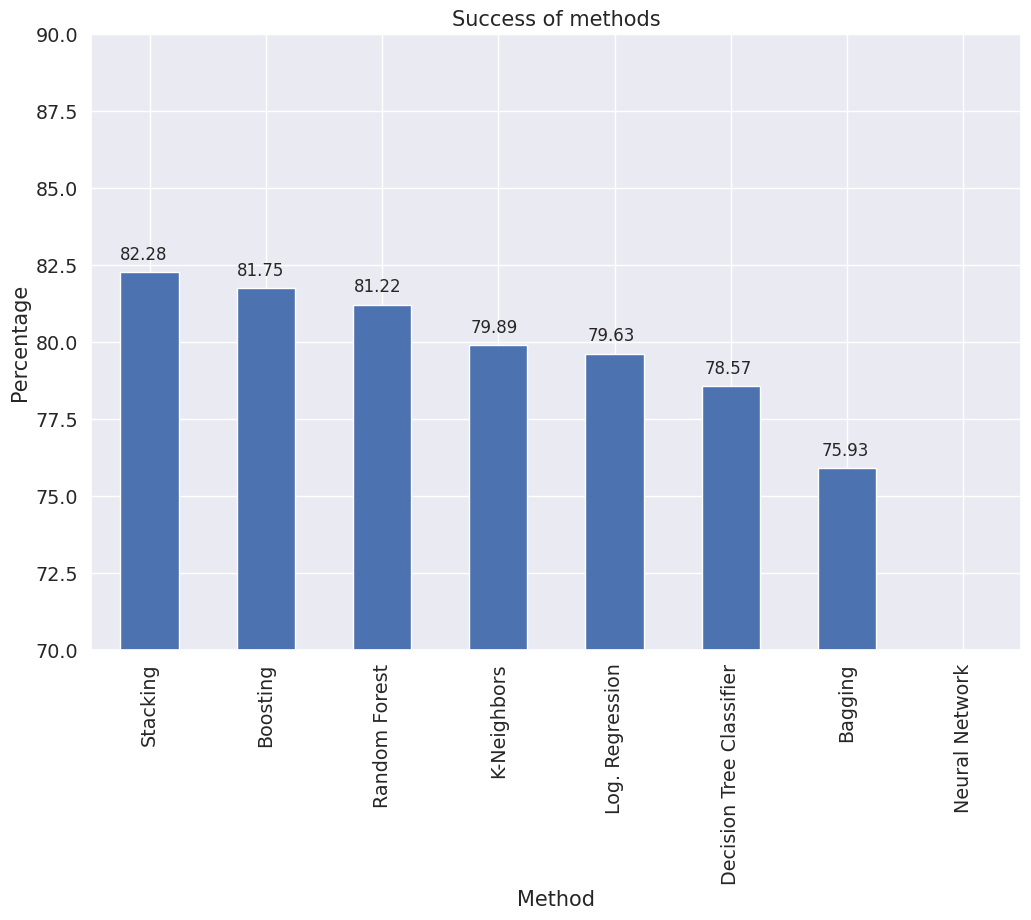

In [ ]:
plotSuccess()

#Creating predictions on test set

In [ ]:

# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
X_test_modified=X_test.iloc[:,:3]
dfTestPredictions = clf.predict(X_test_modified)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


,Index,Treatment
0,5,0
1,494,0
2,52,0
3,984,0
4,186,0


#Submission

In [ ]:
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,0
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,0
374,506,0
375,1142,0
376,1124,0
